In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


In [ ]:
# Load the training data
train_df = pd.read_csv('Train.csv')

In [3]:
print(f"Shape: {train_df.shape}")


Shape: (373, 12)


In [4]:
train_df.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object 
 1   MERCHANT_NAME                          373 non-null    object 
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object 
 3   PURCHASE_VALUE                         373 non-null    int64  
 4   PURCHASED_AT                           373 non-null    object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool   
 6   USER_AGE                               61 non-null     float64
 7   USER_GENDER                            367 non-null    object 
 8   USER_HOUSEHOLD                         373 non-null    int64  
 9   USER_INCOME                            373 non-null    int64  
 10  USER_ID                                373 non-null    object 
 11  Transa

In [ ]:
# Define a function to clean the text
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function and create a new column
train_df['merchant_name_clean'] = train_df['MERCHANT_NAME'].apply(clean_text)


In [7]:
print(train_df[['MERCHANT_NAME', 'merchant_name_clean']].head())

                       MERCHANT_NAME               merchant_name_clean
0  UONSDA CHURCH  MOGERE MWAYO TITHE  uonsda church mogere mwayo tithe
1                          PARK N GO                         park n go
2         SAFARICOM OFFERS  TUNUKIWA         safaricom offers tunukiwa
3            ZILLIONS CREDIT LIMITED           zillions credit limited
4                    MICHAEL MUSEMBI                   michael musembi


In [ ]:
# Create TF-IDF Matrix 
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(train_df['merchant_name_clean'])

print(f"Sparse matrix shape: {X_tfidf.shape}")

Sparse matrix shape: (373, 408)


In [ ]:
# Convert to Dense
X_dense = X_tfidf.toarray()
print(f"Shape of dense array for clustering: {X_dense.shape}")

# Setup for Evaluation Loop
k_range = range(10, 26)  

# Lists to store scores
kmeans_sil = []
gmm_sil = []
gmm_aic = []
gmm_bic = []


Shape of dense array for clustering: (373, 408)


In [ ]:
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=25)
    labels_kmeans = kmeans.fit_predict(X_dense)
    kmeans_sil.append(silhouette_score(X_dense, labels_kmeans))
    
    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=25)
    gmm_labels = gmm.fit_predict(X_dense)
    gmm_sil.append(silhouette_score(X_dense, gmm_labels))
    gmm_aic.append(gmm.aic(X_dense))
    gmm_bic.append(gmm.bic(X_dense))

print("Clustering evaluation complete.")

Clustering evaluation complete.


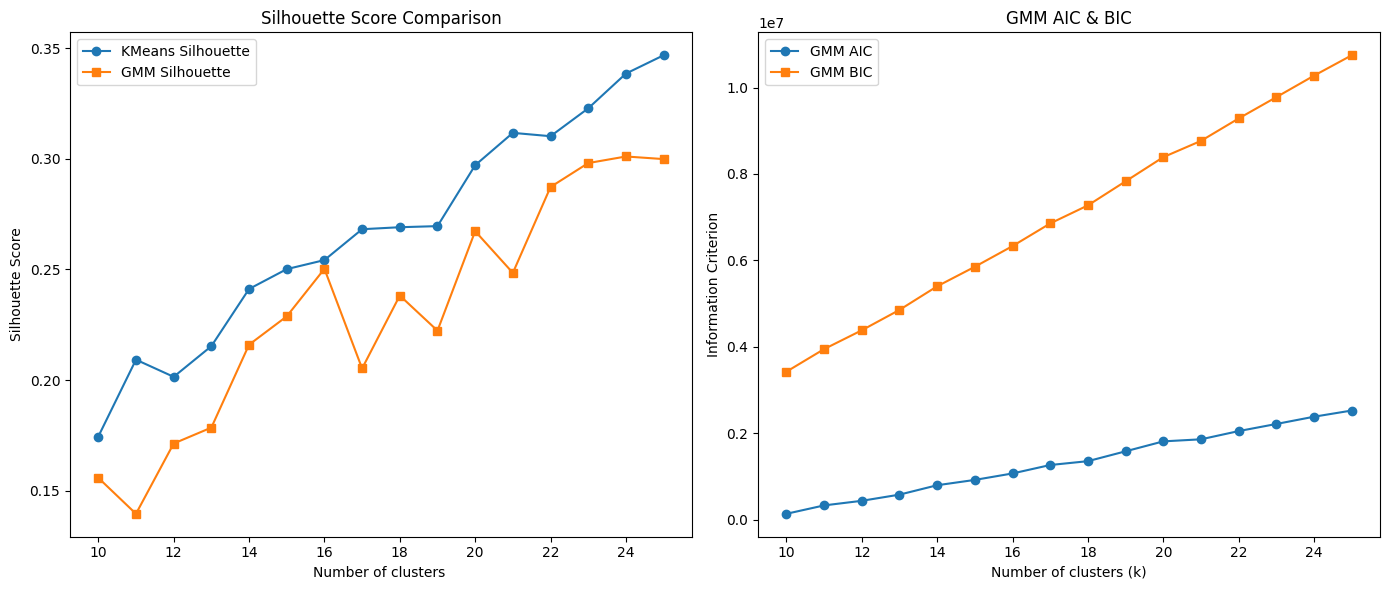

In [ ]:
# Plotting the results
plt.figure(figsize=(14, 6))

# Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(k_range, kmeans_sil, marker='o', label='KMeans Silhouette')
plt.plot(k_range, gmm_sil, marker='s', label='GMM Silhouette')
plt.xlabel("Number of clusters ")
plt.ylabel("Silhouette Score")
plt.legend()
plt.title("Silhouette Score Comparison")

# GMM Information Criterion
plt.subplot(1, 2, 2)
plt.plot(k_range, gmm_aic, marker='o', label='GMM AIC')
plt.plot(k_range, gmm_bic, marker='s', label='GMM BIC')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Information Criterion")
plt.legend()
plt.title("GMM AIC & BIC")

plt.tight_layout()
plt.show()

### **Summary of Clustering Insights**

These charts compare **KMeans** and **Gaussian Mixture Model (GMM)** performance across 10–24 clusters using Silhouette Scores (cluster quality) and AIC/BIC (model fit criteria).

#### **1. Silhouette Score**

* **KMeans** scores increase up to ~17 clusters (~0.33) before flattening, suggesting diminishing returns afterward.
* **GMM** follows a similar trend, peaking near 18 clusters (~0.32) with smoother improvements, reflecting its strength in capturing overlapping or non-spherical clusters.
* **Interpretation:** The data likely contains **15–18 natural groupings**, beyond which cluster separation weakens.

#### 2. GMM AIC & BIC 

* **AIC** decreases steadily with more clusters → favors richer models but risks overfitting.
* **BIC** increases after ~10 clusters → prefers simpler models and penalizes complexity.
* **Interpretation:** The balance between AIC and BIC indicates an optimal trade-off around **15–17 clusters**.

#### **3. Overall Insights**

* Both methods reveal consistent structure, with **Silhouette peaks** and **AIC/BIC trade-offs** converging around **16 clusters**.
* **GMM slightly outperforms KMeans** in stability and interpretability, making it better suited for transaction-based or textual data with varying densities.
* The resulting clusters likely capture merchant or spending categories (e.g., groceries, transport, electronics), possibly finer-grained than the project’s 13 base labels.




In [ ]:
#DBSCAN Clustering

dbscan = DBSCAN(
    eps=1.2,        
    min_samples=3   
)

# Fit the model
labels_dbscan = dbscan.fit_predict(X_dense)

# Analyze the Results 
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)

print(f"DBSCAN Results")
print(f"Estimated number of clusters: {n_clusters}")
print(f"Number of outliers: {n_noise} out of {X_dense.shape[0]}")

# Add cluster labels to the DataFrame
train_df['dbscan_cluster'] = labels_dbscan
print("\nMerchants labeled as noise:")
print(train_df[train_df['dbscan_cluster'] == -1]['MERCHANT_NAME'].head())

DBSCAN Results
Estimated number of clusters: 31
Number of outliers: 122 out of 373

Merchants labeled as noise:
0     UONSDA CHURCH  MOGERE MWAYO TITHE
1                             PARK N GO
3               ZILLIONS CREDIT LIMITED
10                  THREE BINS SERVICES
16                        TABITHA RAORE
Name: MERCHANT_NAME, dtype: object
